**Context** </br>
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies. </br>
</br>
**Source Data** </br>
https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset </br>
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


</br>
</br>
</br>
</br>
**By Muhammad Abdul Latief**

# Import Library and Load Data

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

In [196]:
df = pd.read_csv('../data/bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [198]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no Missing Value. So, it doesnt need to handling missing value

From df.info() we know that data contain 'object' type. So, we will separate the data into categorical and numerical using select dtypes.

In [199]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

In [200]:
numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


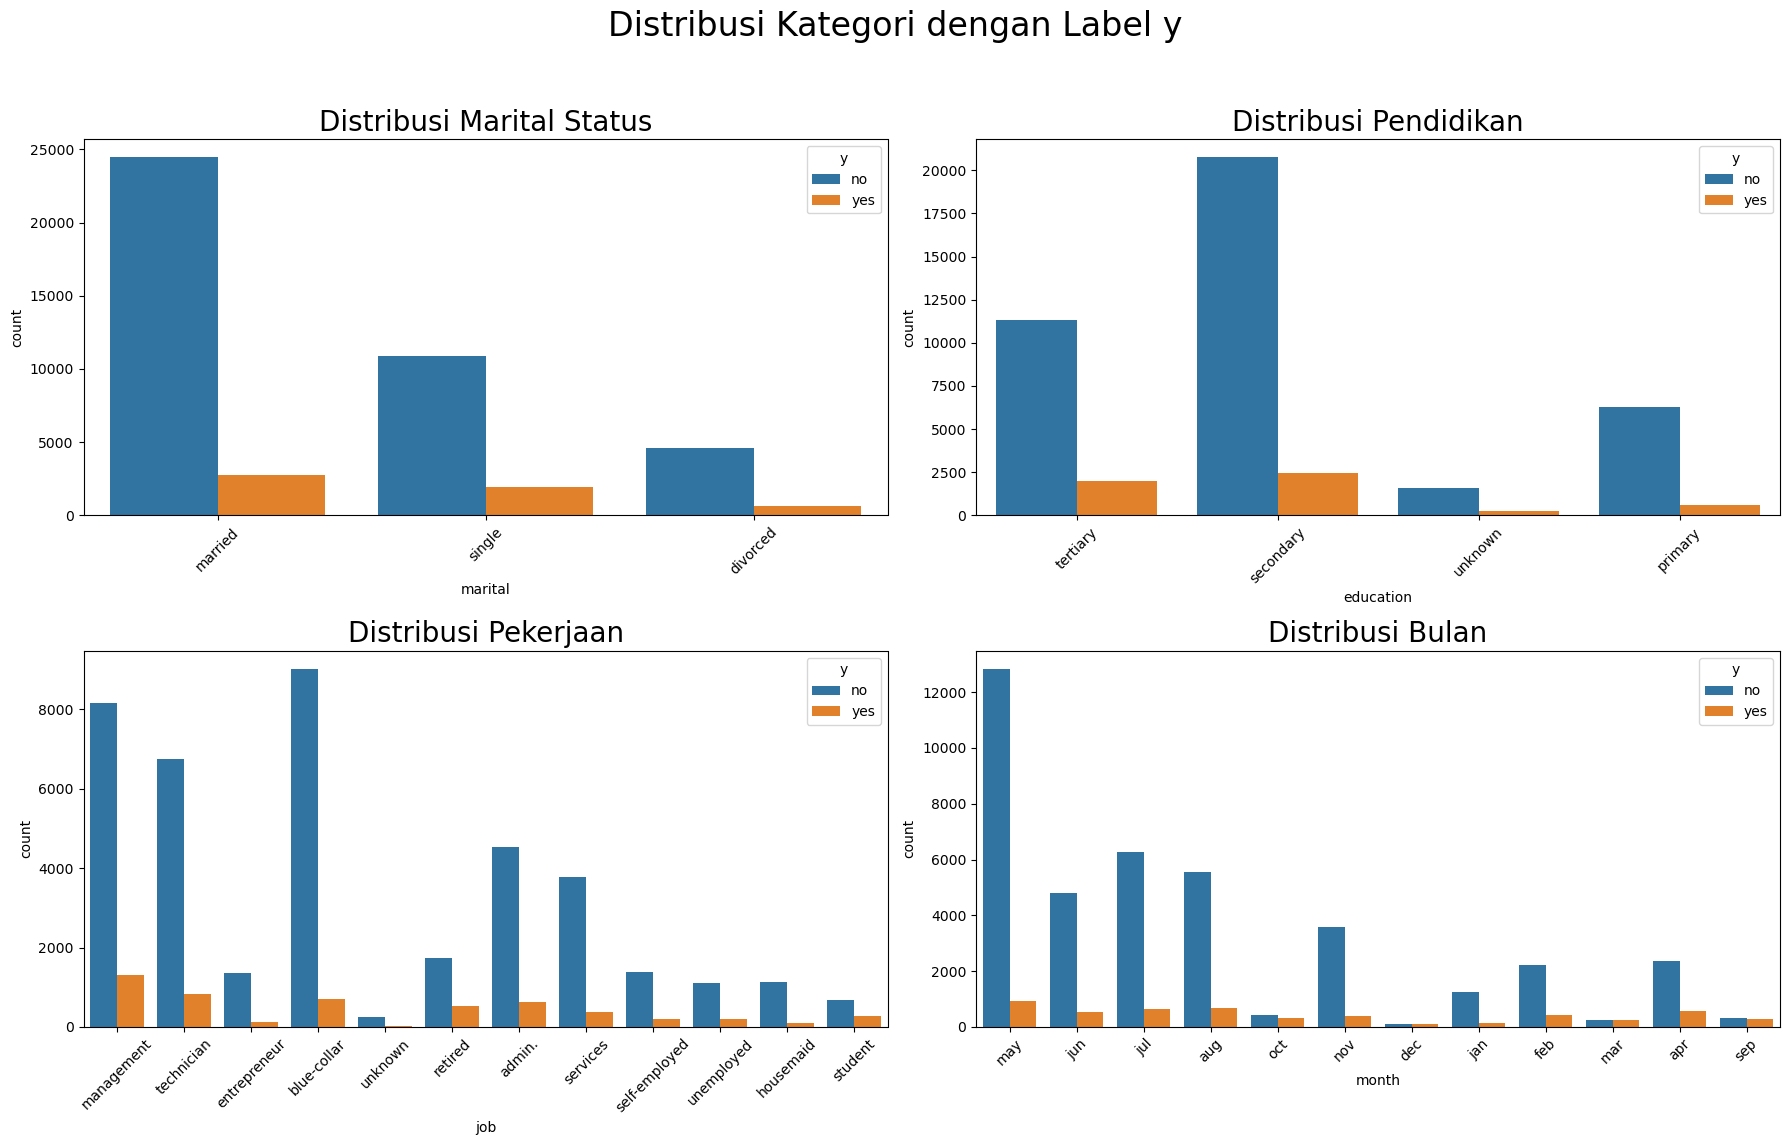

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Distribusi Kategori dengan Label y", fontsize=24)

# Plot untuk marital
sns.countplot(data=categorical, x="marital", hue="y", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Marital Status", fontsize=20)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot untuk education
sns.countplot(data=categorical, x="education", hue="y", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Pendidikan", fontsize=20)
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=categorical, x="job", hue="y", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Pekerjaan", fontsize=20)
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=categorical, x="month", hue="y", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Bulan", fontsize=20)
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

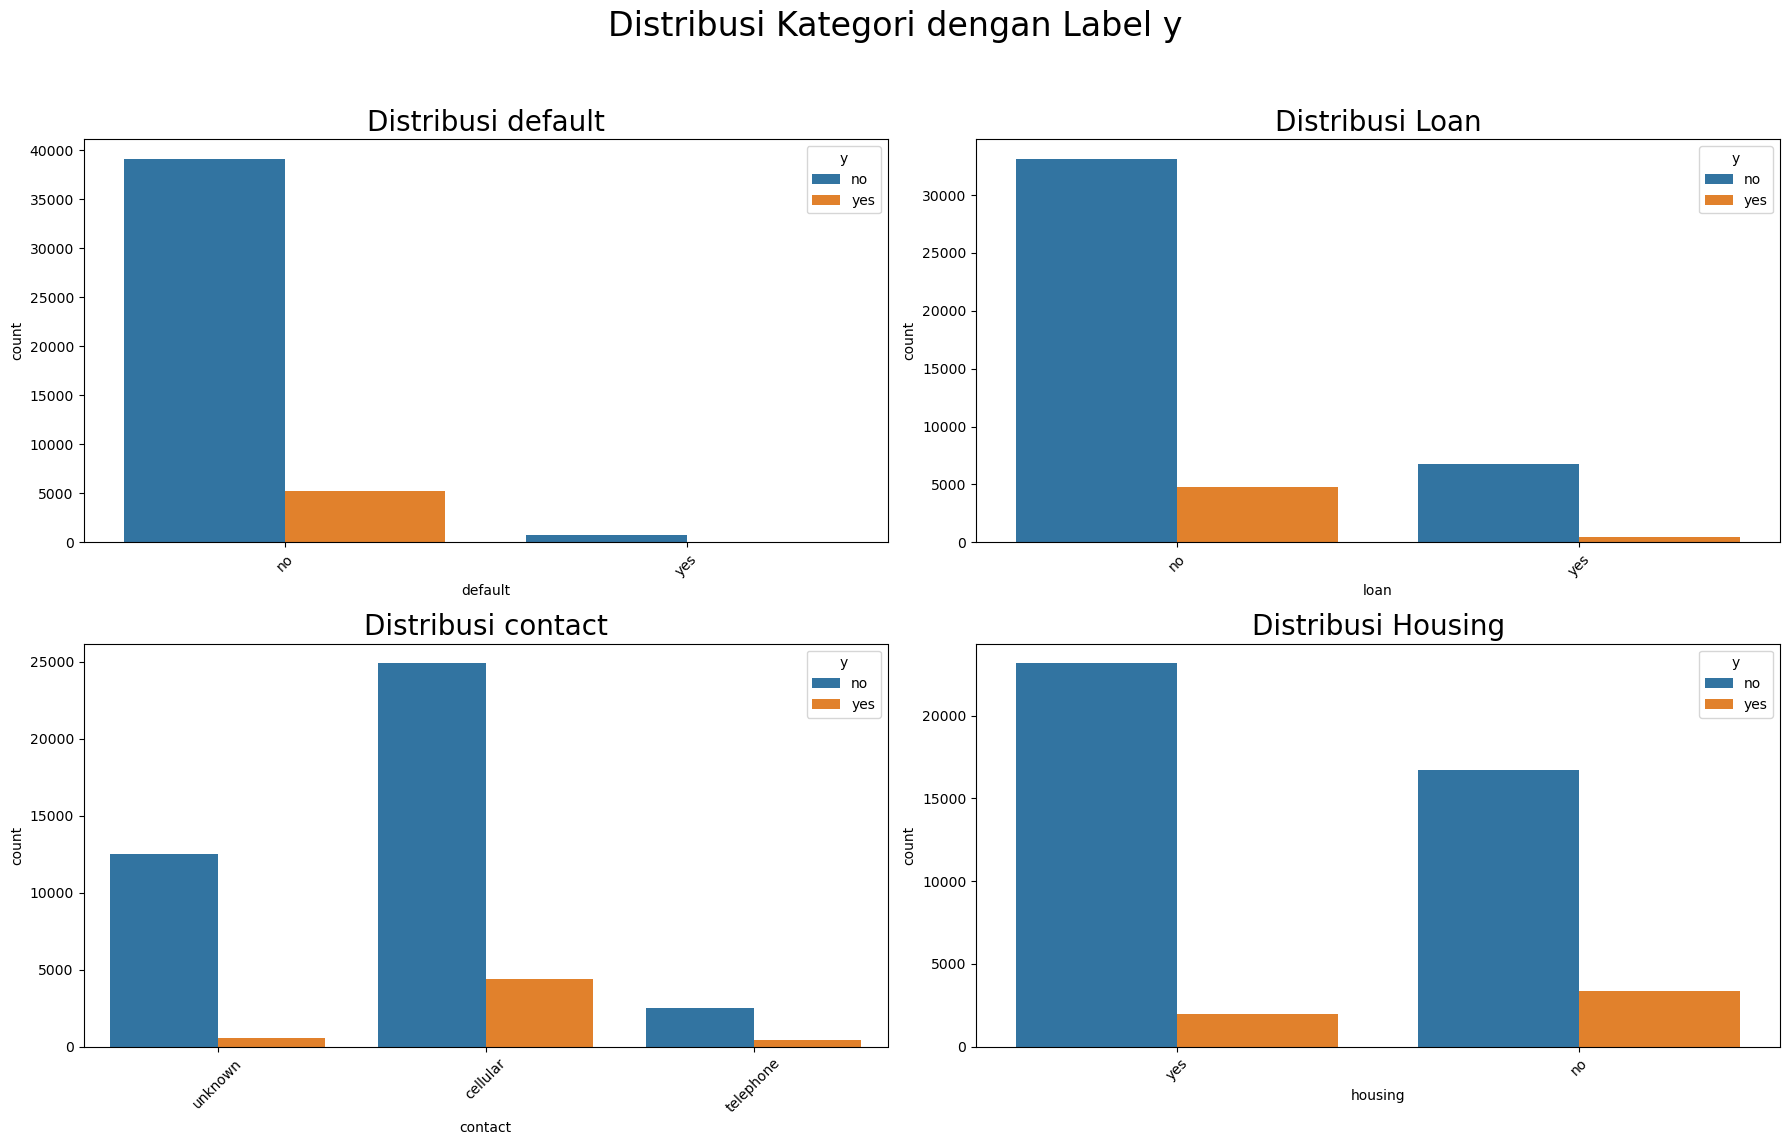

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Distribusi Kategori dengan Label y", fontsize=24)

# Plot untuk marital
sns.countplot(data=categorical, x="default", hue="y", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi default", fontsize=20)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot untuk education
sns.countplot(data=categorical, x="loan", hue="y", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Loan", fontsize=20)
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=categorical, x="contact", hue="y", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi contact", fontsize=20)
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=categorical, x="housing", hue="y", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Housing", fontsize=20)
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

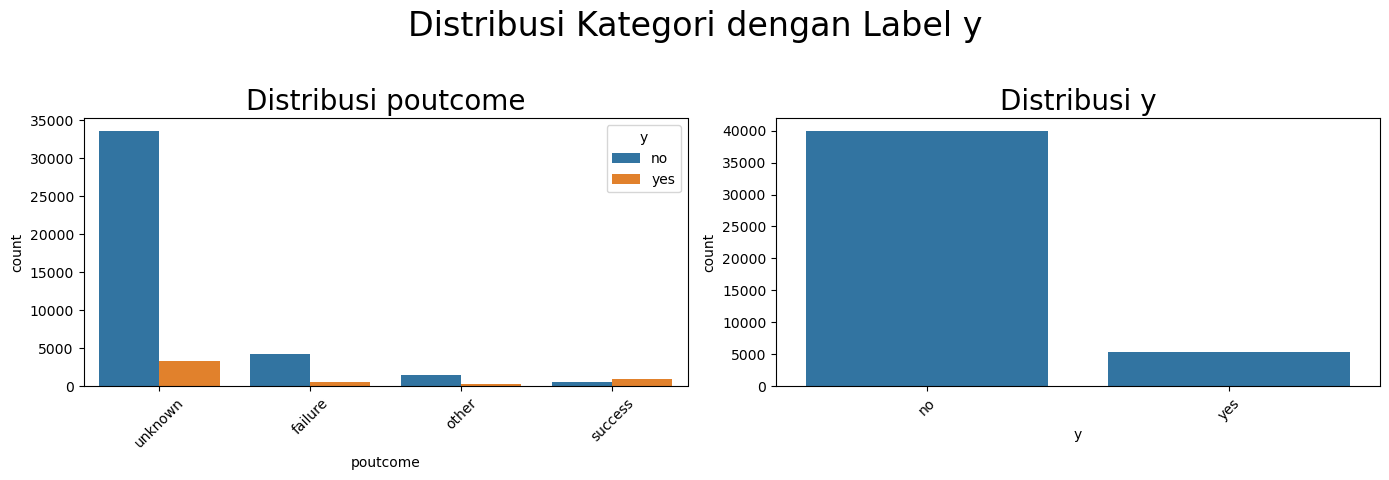

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Distribusi Kategori dengan Label y", fontsize=24)

# Plot untuk marital
sns.countplot(data=categorical, x="poutcome", hue="y", ax=axes[0])
axes[0].set_title("Distribusi poutcome", fontsize=20)
axes[0].tick_params(axis='x', rotation=45)

# Plot untuk education
sns.countplot(data=categorical, x="y", ax=axes[1])
axes[1].set_title("Distribusi y", fontsize=20)
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From Proportion Visualization, we can see that the data is imbalance (based on value on coloumn y)

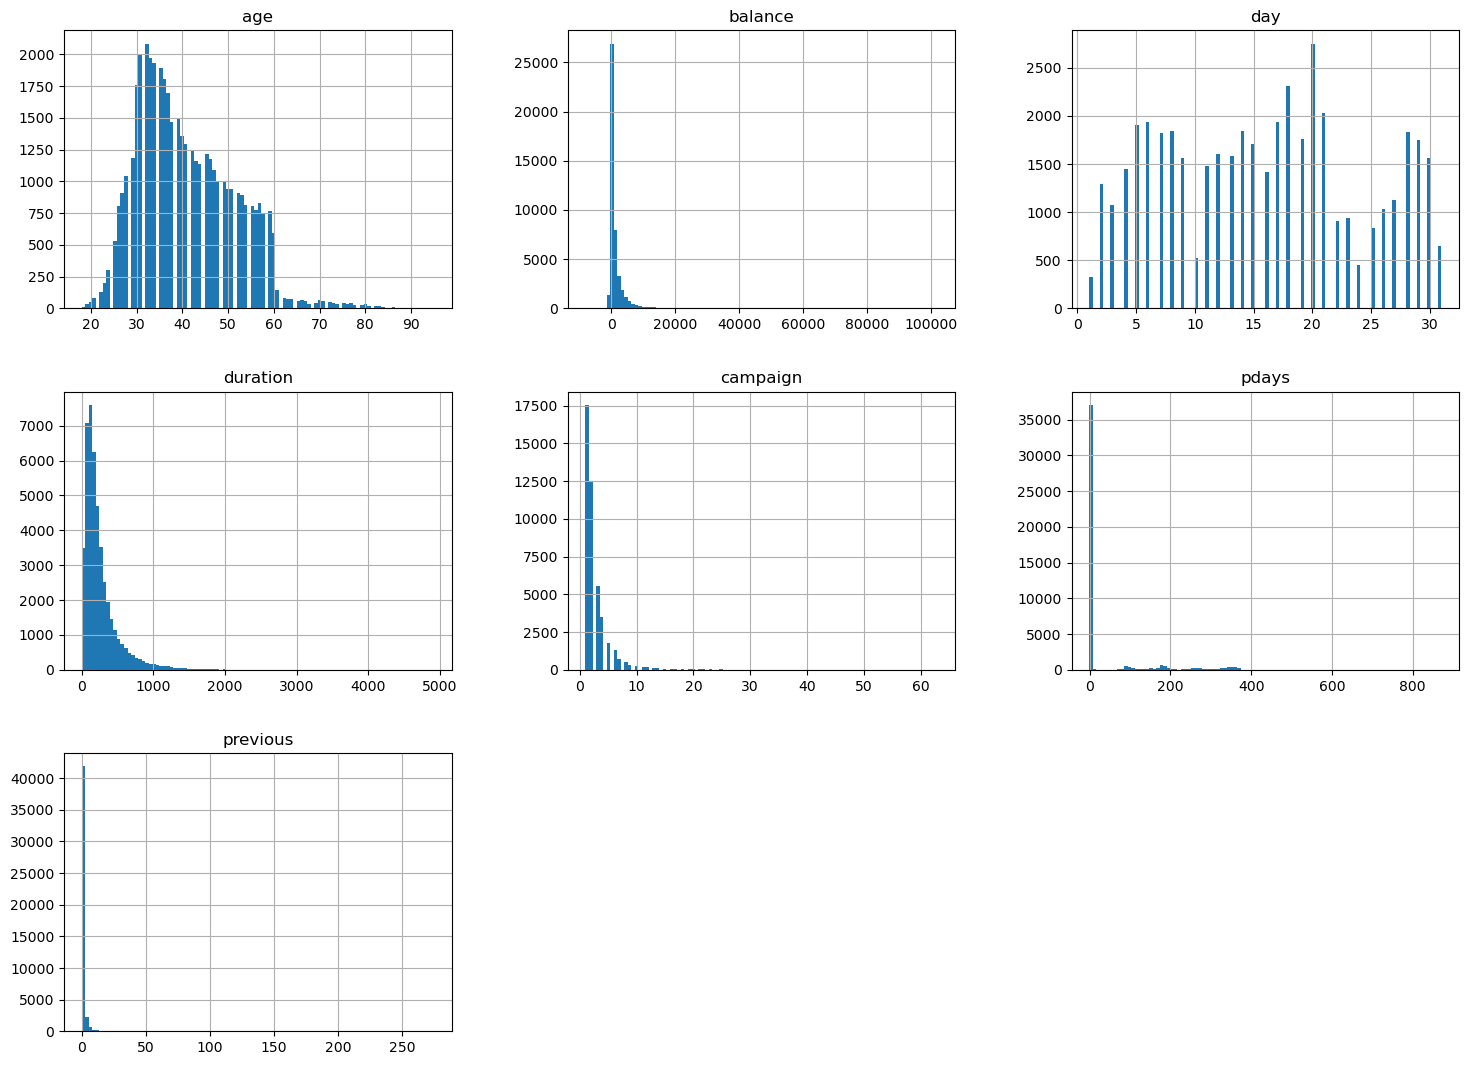

In [204]:
numerical.hist(bins=100, figsize=(18,13));

# Preprocessing 

Algorithm can only calculate numeric feature or numeric data type. To handle the categorical features, we need to consider, which type of encoder we will utilize to each column, so we should check how much the unique value and print the unique value.

In [205]:
categorical.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [206]:
for i in categorical.columns:
    print(i, ":" , categorical[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


month and education are ordinal, so we will use LabelEncoder to encode it. the columns that have 2 value also will be encoded with binary encoder. the others will encoded with one hot encoding.

In [207]:
df= df.join(pd.get_dummies(df['job'], prefix='job').astype('int'))
df= df.join(pd.get_dummies(df['poutcome'], prefix='po').astype('int'))
df= df.join(pd.get_dummies(df['marital'], prefix='marit').astype('int'))
df= df.join(pd.get_dummies(df['contact'], prefix='cont').astype('int'))
df= df.join(pd.get_dummies(df['education'], prefix='edu').astype('int'))

In [208]:
df = df.drop(columns=['job', 'poutcome', 'marital', 'contact', 'education'])

In [209]:
le = LabelEncoder()
df['month']= le.fit_transform(df['month'])

In [210]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marit_divorced,marit_married,marit_single,cont_cellular,cont_telephone,cont_unknown,edu_primary,edu_secondary,edu_tertiary,edu_unknown
0,58,no,2143,yes,no,5,8,261,1,-1,...,0,1,0,0,0,1,0,0,1,0
1,44,no,29,yes,no,5,8,151,1,-1,...,0,0,1,0,0,1,0,1,0,0
2,33,no,2,yes,yes,5,8,76,1,-1,...,0,1,0,0,0,1,0,1,0,0
3,47,no,1506,yes,no,5,8,92,1,-1,...,0,1,0,0,0,1,0,0,0,1
4,33,no,1,no,no,5,8,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,9,977,3,-1,...,0,1,0,1,0,0,0,0,1,0
45207,71,no,1729,no,no,17,9,456,2,-1,...,1,0,0,1,0,0,1,0,0,0
45208,72,no,5715,no,no,17,9,1127,5,184,...,0,1,0,1,0,0,0,1,0,0
45209,57,no,668,no,no,17,9,508,4,-1,...,0,1,0,0,1,0,0,1,0,0


In [211]:
def twovals_encode(df, col, val1):
    return df[col].apply(lambda x:1 if x==val1 else 0)

In [212]:
yes_no_cols= ['default', 'housing', 'loan', 'y']
for i in yes_no_cols:
    df[i]= twovals_encode(df, i, 'yes')
    print(df[i].value_counts())
    print()

default
0    44396
1      815
Name: count, dtype: int64

housing
1    25130
0    20081
Name: count, dtype: int64

loan
0    37967
1     7244
Name: count, dtype: int64

y
0    39922
1     5289
Name: count, dtype: int64



In [213]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marit_divorced,marit_married,marit_single,cont_cellular,cont_telephone,cont_unknown,edu_primary,edu_secondary,edu_tertiary,edu_unknown
0,58,0,2143,1,0,5,8,261,1,-1,...,0,1,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,8,151,1,-1,...,0,0,1,0,0,1,0,1,0,0
2,33,0,2,1,1,5,8,76,1,-1,...,0,1,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,8,92,1,-1,...,0,1,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,8,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,9,977,3,-1,...,0,1,0,1,0,0,0,0,1,0
45207,71,0,1729,0,0,17,9,456,2,-1,...,1,0,0,1,0,0,1,0,0,0
45208,72,0,5715,0,0,17,9,1127,5,184,...,0,1,0,1,0,0,0,1,0,0
45209,57,0,668,0,0,17,9,508,4,-1,...,0,1,0,0,1,0,0,1,0,0


In [214]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,po_failure,po_other,po_success,po_unknown,marit_divorced,marit_married,marit_single,cont_cellular,cont_telephone,cont_unknown,edu_primary,edu_secondary,edu_tertiary,edu_unknown
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.055717,-0.044002,0.021792,0.086650,-0.023571,0.447378,-0.008093,-0.065780,-0.197302,-0.068632,0.000412,0.050200,-0.004927,-0.022967,0.035526,-0.000816,0.164674,0.286257,-0.427817,-0.068375,0.170349,-0.020132,0.196182,-0.093979,-0.081629,0.069665
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,-0.022419,-0.010037,0.010341,0.026281,-0.000359,-0.002655,-0.011290,0.004107,0.000068,-0.016222,-0.003089,0.006470,-0.006669,-0.026389,-0.014445,-0.023344,0.039490,0.017777,-0.014460,0.003115,-0.010061,-0.017208,0.019933,0.001623,0.013220,-0.015239,-0.001236
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.026726,-0.048757,0.009642,0.001661,0.067797,0.046900,0.017850,-0.038151,0.001233,-0.016183,0.009023,0.010784,0.011857,0.008466,0.035240,-0.030271,-0.021732,0.025708,-0.012537,0.015880,0.037999,-0.037331,-0.015451,-0.069937,0.084001,0.011181
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.139173,0.043046,0.177475,0.010600,-0.079380,-0.063382,-0.156633,-0.027319,0.070435,-0.085066,-0.012823,-0.048229,-0.075023,0.106795,0.039710,-0.091360,-0.063755,0.001778,0.017681,-0.020475,-0.156071,-0.080822,0.208409,0.010671,0.101659,-0.099175,-0.047595
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,-0.068185,0.030781,0.018291,0.039808,-0.017234,-0.038904,-0.014861,-0.007882,0.035575,-0.058503,0.014798,-0.035961,-0.031943,-0.002186,-0.009099,-0.053713,0.031406,0.016377,0.036906,-0.051716,0.013604,-0.013183,-0.007211,-0.012396,0.070625,-0.045940,-0.049992
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.010455,-0.022898,-0.002312,0.003955,0.019021,-0.010123,0.005062,-0.006531,-0.015894,0.032517,-0.006382,-0.011199,-0.068700,-0.032952,-0.030321,0.086256,-0.000433,0.007102,-0.007412,0.020186,0.023652,-0.034103,-0.019551,-0.005831,0.021730,0.000114
month,-0.042357,0.011486,0.019777,0.271481,0.022145,-0.006028,1.000000,0.006314,-0.110031,0.033065,0.022727,-0.024471,0.037639,0.090080,0.037585,-0.036506,-0.057542,-0.024422,0.004093,0.038820,-0.001372,-0.083168,-0.004462,-0.011800,0.031249,0.005385,0.007806,-0.031538,0.026538,-0.025927,0.009369,-0.338259,-0.004616,0.359322,0.033928,0.043165,-0.080724,0.015336
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,0.006314,1.000000,-0.084570,-0.001565,0.001203,0.394521,-0.015722,0.009637,-0.001327,-0.008046,-0.008323,0.026032,0.007383,0.001427,-0.006504,-0.009176,0.020322,-0.006390,-0.018925,-0.001958,0.042389,-0.003491,0.006100,-0.022683,0.020328,0.025543,-0.023201,-0.014379,-0.003660,0.002084,0.000891,-0.000682
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.110031,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,-0.021868,0.008986,0.002128,0.003097,0.016686,-0.030913,0.005479,-0.004671,-0.021813,0.020739,-0.018448,0.014091,-0.088131,-0.020107,-0.057486,0.107965,-0.015484,0.031371,-0.023120,-0.032271,0.053895,0.004853,0.009616,-0.020893,0.012866,0.005704
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,0.033065,-0.001565,-0.088628,1.000000,0.454820,0.103621,0.027497,0.020063,-0.014203,-0.031350,-0.007871,-0.006315,-0.010356,0.005710,0.024486,-0.013478,-0.010411,-0.015366,0.701052,0.389791,0

# Cluster Analysis 

Aim : To understand fundamental pattern of data

In [230]:
clus= df.drop(columns=['month','y'], axis=1)
clus.shape[1]

36

In [231]:
clus.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'po_failure', 'po_other', 'po_success',
       'po_unknown', 'marit_divorced', 'marit_married', 'marit_single',
       'cont_cellular', 'cont_telephone', 'cont_unknown', 'edu_primary',
       'edu_secondary', 'edu_tertiary', 'edu_unknown'],
      dtype='object')

In [232]:
binary_columns = clus.drop(columns=numerical.columns).columns
cont_columns = numerical.columns

In [233]:
binary_columns

Index(['default', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'po_failure', 'po_other', 'po_success',
       'po_unknown', 'marit_divorced', 'marit_married', 'marit_single',
       'cont_cellular', 'cont_telephone', 'cont_unknown', 'edu_primary',
       'edu_secondary', 'edu_tertiary', 'edu_unknown'],
      dtype='object')

In [234]:
cont_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [235]:
clus

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,marit_divorced,marit_married,marit_single,cont_cellular,cont_telephone,cont_unknown,edu_primary,edu_secondary,edu_tertiary,edu_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,1,0,1,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,1,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,1,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,1,0,1,0,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,1,0,0,1,0,0,1,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,1,0,1,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,1,0,0,1,0,0,1,0,0


In [236]:
# from sklearn.preprocessing import RobustScaler
sc= StandardScaler()
cluscont= clus[cont_columns]
clus_sc= sc.fit_transform(cluscont)
clus_sc = pd.DataFrame(clus_sc, columns=cont_columns)
clus_bin = clus[binary_columns]
clus_sc = pd.concat([clus_sc, clus_bin.reset_index(drop=True)], axis=1)

#### PCA (for dimensionality reduction that will make computation lighter)

In [237]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clus_pca = pca.fit_transform(clus_sc)
clus_pca

array([[-0.30895349,  1.81708395],
       [-0.25630945, -0.02232644],
       [-0.27330376, -0.50990619],
       ...,
       [ 1.71403531,  3.37536805],
       [-0.70000126,  1.26744634],
       [ 4.02516717,  0.03489294]])

2   0.32715246865039677
3   0.48245867964416644
4   0.43526059238771736
5   0.41963004039848406
6   0.38115793637765966
7   0.3815510753681042
8   0.39388463021743814
9   0.3598186059679971
10   0.3550861228589094


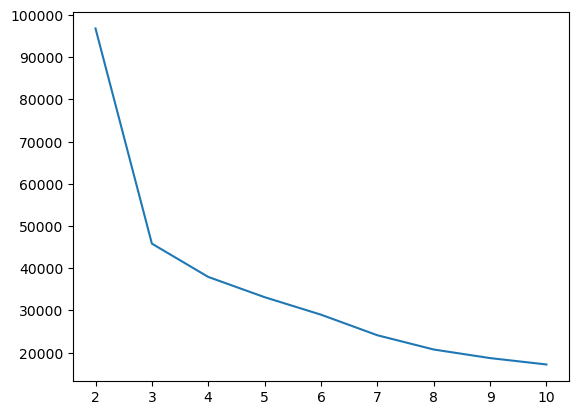

In [238]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = [] #Within-Cluster Sum of Squares = the total squared distance between each data point and the centroid (center) of the cluster
for i in range(2, 11):
    km= KMeans(n_clusters=i, init='k-means++', random_state=7)
    km.fit(clus_pca)
    wcss.append(km.inertia_)
    print(i, " ", silhouette_score(clus_pca, km.labels_))
plt.plot(range(2,11), wcss)

In [242]:
k= KMeans(n_clusters=3, init='k-means++', random_state=7)
y_pred= k.fit_predict(clus_pca)
clus['clusters']= y_pred
clus

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,marit_married,marit_single,cont_cellular,cont_telephone,cont_unknown,edu_primary,edu_secondary,edu_tertiary,edu_unknown,clusters
0,58,0,2143,1,0,5,261,1,-1,0,...,1,0,0,0,1,0,0,1,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,1,0,0,1,0,1,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,1,0,0,0,1,0,1,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,1,0,0,0,1,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,1,0,1,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,1,0,0,1,0,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,1,0,1,0,0,0,1,0,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,1,0,0,1,0,0,1,0,0,0


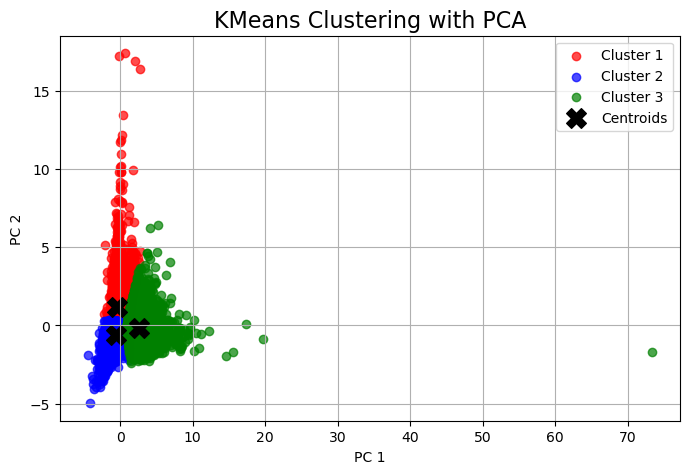

In [243]:
plt.figure(figsize=(8, 5))
plt.title('KMeans Clustering with PCA', fontsize=16)

colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(clus_pca[y_pred == i, 0], clus_pca[y_pred == i, 1], 
                c=colors[i], alpha=0.7, label=f'Cluster {i+1}')

# Plot centroid dengan marker 'X' agar lebih jelas
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], 
            c='black', marker='X', s=200, label='Centroids')

plt.legend()
plt.xlabel('PC 1', fontsize=10)
plt.ylabel('PC 2', fontsize=10)
plt.grid(True)
plt.show()

In [244]:
clus_groupby= clus.groupby('clusters').mean().reset_index()

clus_demo= clus_groupby[['age', 'marit_divorced',
       'marit_married', 'marit_single', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'edu_primary', 'edu_secondary',
       'edu_tertiary', 'edu_unknown']].T
clus_bank= clus_groupby[['default', 'balance', 'housing','loan']].T
clus_campaign= clus_groupby[['duration',
       'campaign', 'pdays', 'previous', 'po_failure',
       'po_other', 'po_success', 'po_unknown', 'cont_cellular', 'cont_telephone',
       'cont_unknown']].T

### Demographic Cluster

In [254]:
clus_demo

,0,1,2
age,51.513836,35.027264,39.363881
marit_divorced,0.151809,0.093682,0.113173
marit_married,0.773402,0.511133,0.559632
marit_single,0.074789,0.395186,0.327195
job_admin.,0.084617,0.125147,0.138527
job_blue-collar,0.201366,0.223828,0.214589
job_entrepreneur,0.039381,0.030331,0.028329
job_housemaid,0.048582,0.018232,0.015439
job_management,0.206454,0.208410,0.217422
job_retired,0.139681,0.002857,0.027195


In [258]:
clus_demo.T

,age,marit_divorced,marit_married,marit_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,edu_primary,edu_secondary,edu_tertiary,edu_unknown
0,51.513836,0.151809,0.773402,0.074789,0.084617,0.201366,0.039381,0.048582,0.206454,0.139681,0.035269,0.067749,0.001394,0.130689,0.032899,0.011919,0.244650,0.428103,0.268140,0.059106
1,35.027264,0.093682,0.511133,0.395186,0.125147,0.223828,0.030331,0.018232,0.208410,0.002857,0.034532,0.105655,0.028189,0.191396,0.027432,0.003991,0.105276,0.558940,0.303983,0.031801
2,39.363881,0.113173,0.559632,0.327195,0.138527,0.214589,0.028329,0.015439,0.217422,0.027195,0.035552,0.094476,0.034986,0.165156,0.025212,0.003116,0.118272,0.531870,0.314164,0.035694


In [259]:
marital = clus_demo.T[['marit_single', 'marit_married', 'marit_divorced']]

In [265]:
job = clus_demo.T[['job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown']]

In [267]:
education = marital = clus_demo.T[['edu_primary', 'edu_secondary',
       'edu_tertiary', 'edu_unknown']]

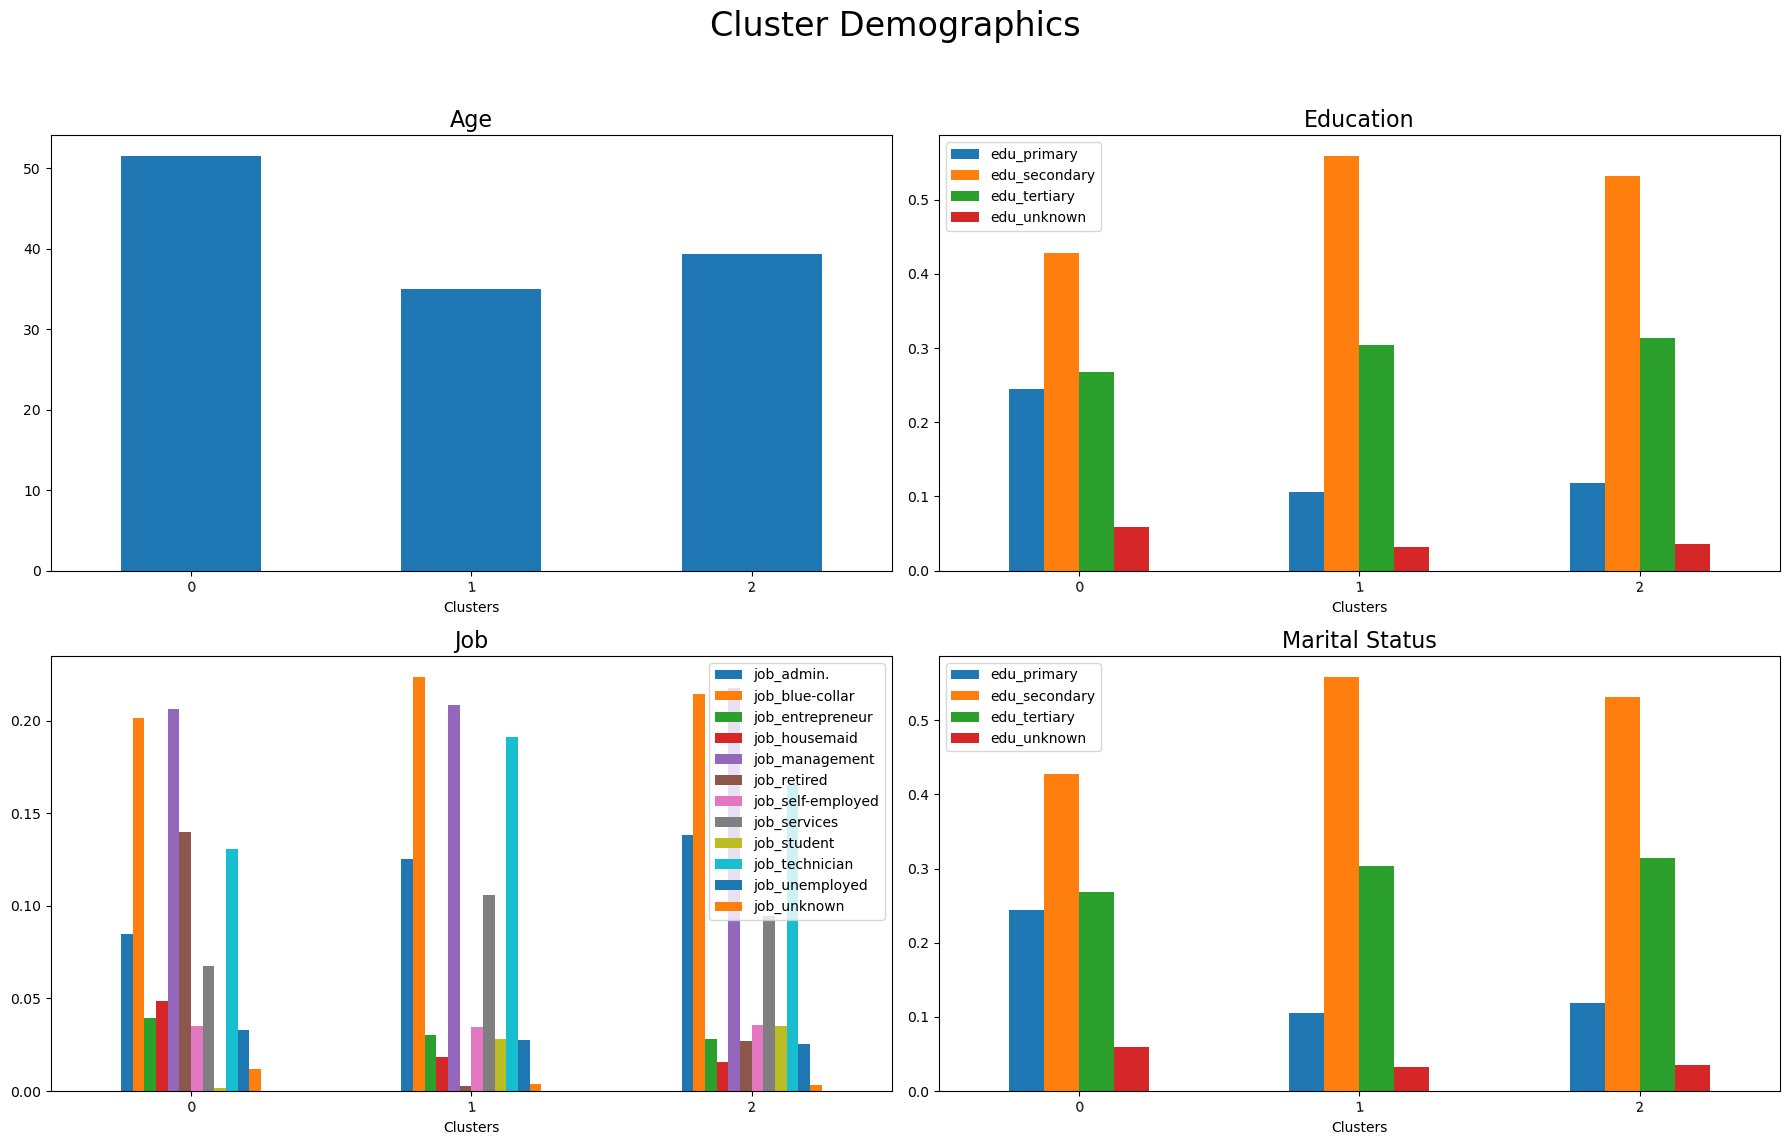

In [291]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Cluster Demographics", fontsize=24)

# Plot untuk marital
clus_demo.T.age.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Age", fontsize=16)
axes[0, 0].set_xlabel('Clusters')
axes[0, 0].tick_params(axis='x', rotation=5)

# Plot untuk education
education.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Education", fontsize=16)
axes[0, 1].set_xlabel('Clusters')
axes[0, 1].tick_params(axis='x', rotation=5)

job.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Job", fontsize=16)
axes[1, 0].set_xlabel('Clusters')
axes[1, 0].tick_params(axis='x', rotation=5)

marital.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Marital Status", fontsize=16)
axes[1, 1].set_xlabel('Clusters')
axes[1, 1].tick_params(axis='x', rotation=5)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 cluster 1: </br>

- 77% of customers falling under cluster 1 are married and have an average age of 51 years
- Majority have an educational qualification of secondary followed by tertiary then primary.
- The majority job is self employment job. </br>
</br>
cluster 2: </br>
- 51% of customers falling under cluster 2 are married and have an average age of 35 years
- Majority have an educational qualification of secondary followed by tertiary then primary.
- The majority job is blue colar.</br>
</br>
cluster 3: </br>
- 53% of customers falling under cluster 1 are married and have an average age of 39 years
- Majority have an educational qualification of secondary followed by tertiary then primary
- The majority job is self employment job and followed by blue colar

### FINANCIAL BEHAVIOR

In [246]:
clus_bank

,0,1,2
default,0.011989,0.024660,0.007932
balance,2515.862062,680.719795,1315.970963
housing,0.413187,0.603848,0.683853
loan,0.142608,0.175391,0.144901


In [319]:
def bar_plt(ax, df, col1, col2, title):
    sns.barplot(data=df, x=col1, y=col2, ax=ax)
    for i in ax.containers:
        ax.bar_label(i)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)

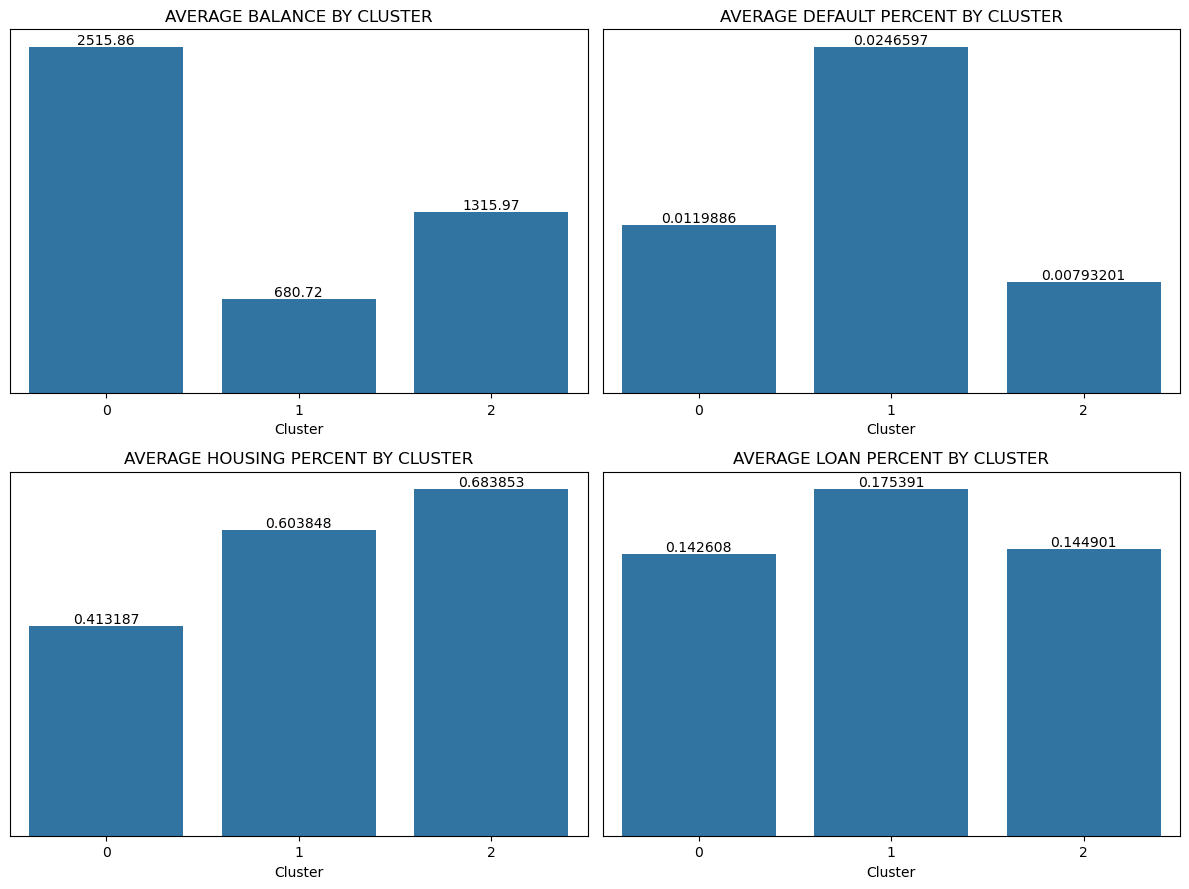

In [322]:
balance_data = clus_bank.loc['balance'].reset_index()
balance_data.columns = ['Cluster', 'Balance']

default_data = clus_bank.loc['default'].reset_index()
default_data.columns = ['Cluster', 'Default']

housing_data = clus_bank.loc['housing'].reset_index()
housing_data.columns = ['Cluster', 'Housing']

loan_data = clus_bank.loc['loan'].reset_index()
loan_data.columns = ['Cluster', 'Loan']

# Membuat subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

bar_plt(axes[0, 0], balance_data, 'Cluster', 'Balance', 'AVERAGE BALANCE BY CLUSTER')
bar_plt(axes[0, 1], default_data, 'Cluster', 'Default', 'AVERAGE DEFAULT PERCENT BY CLUSTER')
bar_plt(axes[1, 0], housing_data, 'Cluster', 'Housing', 'AVERAGE HOUSING PERCENT BY CLUSTER')
bar_plt(axes[1, 1], loan_data, 'Cluster', 'Loan', 'AVERAGE LOAN PERCENT BY CLUSTER')

plt.tight_layout()
plt.show()

cluster 1:</br>

- Average Balance: 2,515.86 (highest)
- Average Default: 0.012 (low, indicating strong financial stability)
- Housing Loan: 41.3% (lowest among all clusters, suggesting fewer customers with mortgages)
- Personal Loan: 14.3% (moderate, indicating low dependence on personal loans)
- Conclusion: Customers in this cluster tend to be wealthier, with high balances and low reliance on housing and personal loans.
</br>
</br>
cluster 2:</br>
- Average Balance: 680.72 (lowest, indicating weaker financial position)
- Average Default: 0.025 (highest, indicating greater default risk)
- Housing Loan: 60.4% (relatively high, suggesting more customers with mortgages)
- Personal Loan: 17.5% (highest, indicating high dependence on personal loans)
- Conclusion: Customers in this cluster may have lower financial stability, with low balances and high reliance on loans.
</br>
</br>
cluster 3: </br>
- Average Balance: 1,315.97 (moderate, between clusters 0 and 1)
- Average Default: 0.008 (lowest, indicating very stable financial situation)
- Housing Loan: 68.4% (highest, suggesting many customers with mortgages)
- Personal Loan: 14.5% (moderate, similar to cluster 0)
- Conclusion: Customers in this cluster likely have moderate financial stability, with decent balances and manageable loan dependency.

### Campaign Results

In [247]:
clus_campaign

,0,1,2
duration,291.648289,238.215804,257.371671
campaign,2.356033,3.217106,2.064306
pdays,5.547013,0.277894,245.210482
previous,0.109849,0.023483,3.413881
po_failure,0.022095,0.005461,0.630878
po_other,0.012128,0.004915,0.219405
po_success,0.022444,0.005671,0.149292
po_unknown,0.943333,0.983952,0.000425
cont_cellular,0.570851,0.611494,0.926204
cont_telephone,0.099603,0.042682,0.065297


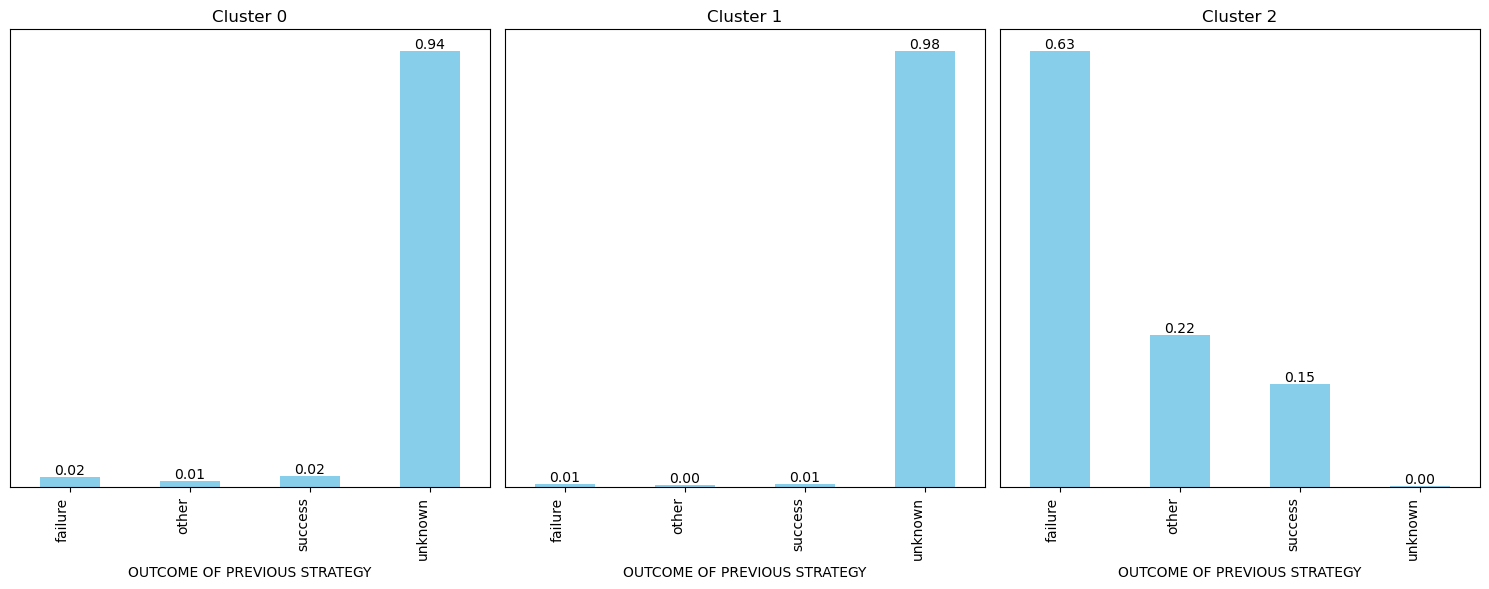

In [302]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for idx in range(3):
    ax = clus_campaign.iloc[4:8, idx].plot(kind='bar', ax=axes[idx], color='skyblue')
    ax.set_title(f'Cluster {idx}')
    ax.set_xlabel('OUTCOME OF PREVIOUS STRATEGY')
    ax.get_yaxis().set_visible(False)
    ax.set_xticklabels([label.split('_')[1] for label in clus_campaign.index[4:8]], ha='right')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

In [314]:
def bar_plt(df, col1, col2, title):
    plt.figure(figsize=(7,5))
    a= sns.barplot(data= df, x=col1, y=col2)
    for i in a.containers:
        a.bar_label(i)
    plt.gca().get_yaxis().set_visible(False)
    plt.title(title)
    plt.show()

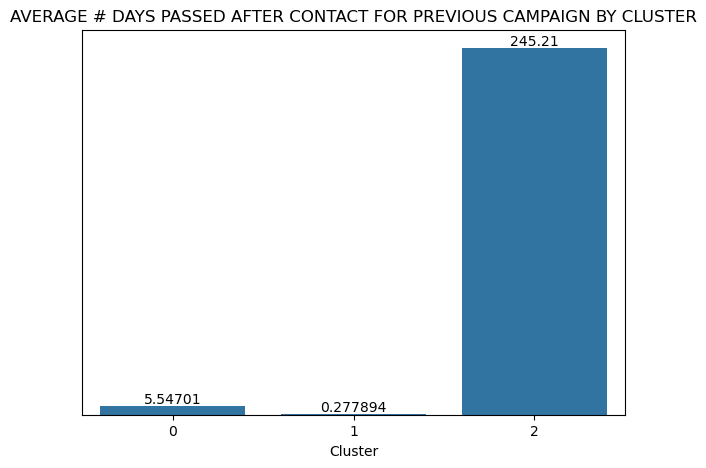

In [315]:
pdays_data = clus_campaign.loc['pdays'].reset_index()
pdays_data.columns = ['Cluster', 'pdays']
bar_plt(pdays_data, 'Cluster', 'pdays', 'AVERAGE # DAYS PASSED AFTER CONTACT FOR PREVIOUS CAMPAIGN BY CLUSTER')

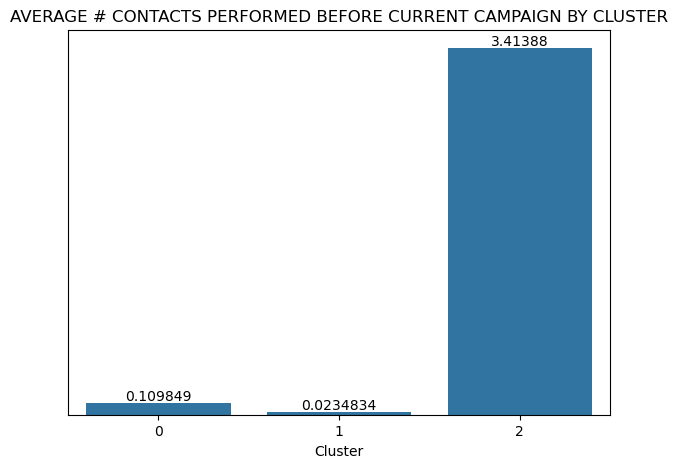

In [316]:
prev_data = clus_campaign.loc['previous'].reset_index()
prev_data.columns = ['Cluster', 'previous']
bar_plt(prev_data, 'Cluster', 'previous', 'AVERAGE # CONTACTS PERFORMED BEFORE CURRENT CAMPAIGN BY CLUSTER')

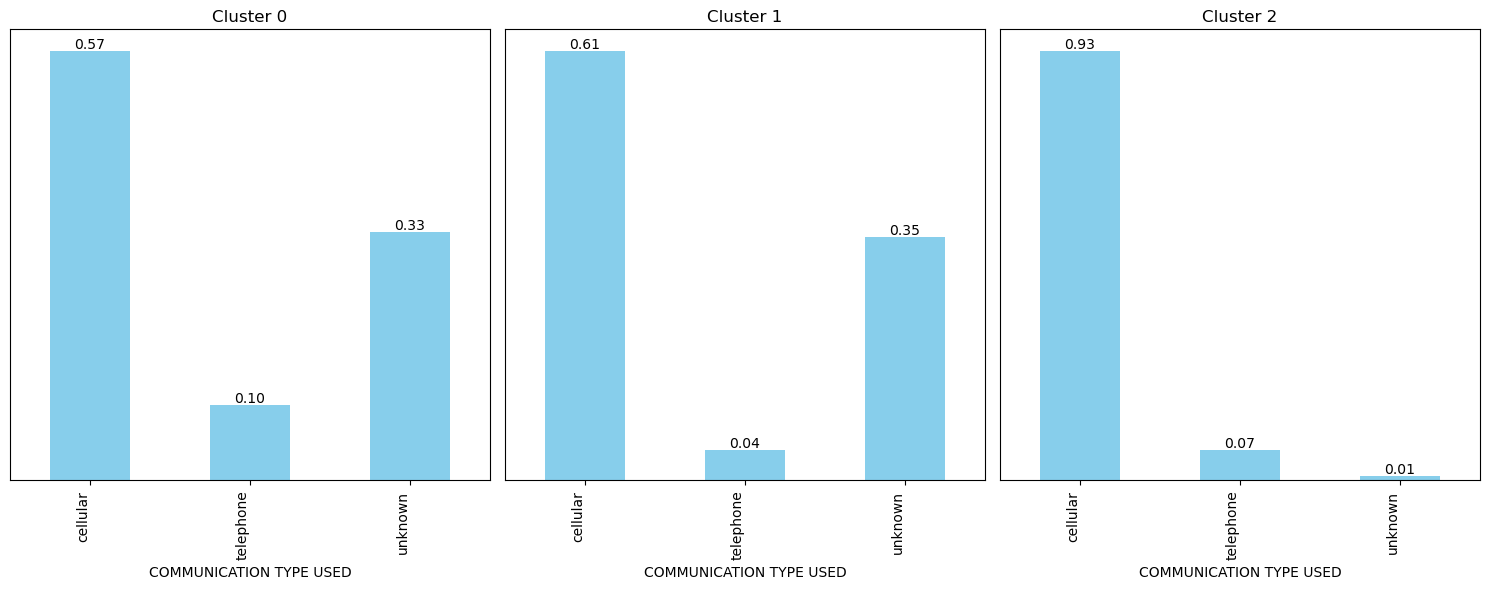

In [317]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for idx in range(3):
    ax = clus_campaign.iloc[8:11, idx].plot(kind='bar', ax=axes[idx], color='skyblue')
    ax.set_title(f'Cluster {idx}')
    ax.set_xlabel('COMMUNICATION TYPE USED')
    ax.get_yaxis().set_visible(False)
    ax.set_xticklabels([label.split('_')[1] for label in clus_campaign.index[8:11]], ha='right')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

Cluster 1 </br>
This cluster has the highest average call duration, approximately 291.65 seconds, indicating that customers in this group tend to engage more in conversations. However, the average number of campaign contacts required to reach them is relatively low (2.36), suggesting that while they may take longer to respond, they are easier to reach compared to other clusters. Additionally, the average pdays (5.55) and previous contact count (0.11) indicate that these customers might be newer or less frequently contacted. Most of the previous campaign outcomes for this group are unknown (94.33% po_unknown), with only a small portion being successful (po_success 2.2%). The primary contact method for this cluster is cellular (57.08%), followed by telephone (9.96%) and unknown (32.95%), reflecting a mix of communication approaches.
</br>
</br>
Cluster 2 </br>
This cluster has the shortest average call duration, around 238.22 seconds, indicating potentially less intense or more straightforward interactions. However, it also has the highest average number of campaign contacts (3.22), suggesting a greater effort is required to reach these customers. With a very low pdays value (0.28) and almost zero previous contacts (0.02), this group likely consists of new prospects or customers who have been recently approached. Almost all previous outcomes are unknown (98.40% po_unknown), with a very low success rate (po_success 0.55%). Most contacts in this cluster are made through cellular (61.15%), followed by telephone (4.27%) and unknown (34.58%), indicating a strong preference for mobile communication.
</br>
</br>
Cluster 3 </br>
This cluster has a moderate average call duration (257.37 seconds) but exhibits significantly different characteristics from the other two clusters. It has a very high average pdays (245.21), indicating that these customers are likely older leads who have not been contacted in a long time. Additionally, the number of previous contacts (3.41) is much higher than in the other clusters, suggesting frequent follow-ups. Despite this, the previous campaign success rate is still relatively low (po_success 14.93%), although higher than the other clusters. Most contacts in this group are made via cellular (92.62%), while telephone (6.53%) and unknown (0.85%) make up a much smaller proportion, highlighting a clear preference for mobile communication.